In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/5001add3/whether_data-1.csv
/kaggle/input/5001add4/whether_data-2.csv
/kaggle/input/msbd5001-fall2020/sampleSubmission.csv
/kaggle/input/msbd5001-fall2020/train.csv
/kaggle/input/msbd5001-fall2020/test.csv
/kaggle/input/5001add/train.csv
/kaggle/input/5001add/test.csv
/kaggle/input/5001add5/whether_data-4.csv
/kaggle/input/5001add5/whether_data-3.csv


# 1. Read data and pre-processing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Read data
data_raw = pd.read_csv("./data/train.csv")
data_test = pd.read_csv("./data/test.csv")
data_sample = pd.read_csv("./data/sampleSubmission.csv")
print("train data:\n",data_raw.head(5))
print("test data:\n",data_test.head(5))
print("sample data:\n",data_sample.head(5))

train data:
    id           date      speed
0   0  1/1/2017 0:00  43.002930
1   1  1/1/2017 1:00  46.118696
2   2  1/1/2017 2:00  44.294158
3   3  1/1/2017 3:00  41.067468
4   4  1/1/2017 4:00  46.448653
test data:
    id            date
0   0   1/1/2018 2:00
1   1   1/1/2018 5:00
2   2   1/1/2018 7:00
3   3   1/1/2018 8:00
4   4  1/1/2018 10:00
sample data:
    id  speed
0   0      0
1   1      0
2   2      0
3   3      0
4   4      0


In [ ]:
# Processing with data type
print("Origin data Type:",data_raw.dtypes)

# transform column 'date' from 'object' to 'datetime'
data_raw['date']= pd.to_datetime(data_raw['date'], format='%d/%m/%Y %H:%M')
data_test['date']= pd.to_datetime(data_test['date'], format='%d/%m/%Y %H:%M')
print("\nTrain Data Type:",data_raw.dtypes)
print("\nTest Data Type:",data_test.dtypes)

Origin data Type: id         int64
date      object
speed    float64
dtype: object

Train Data Type: id                int64
date     datetime64[ns]
speed           float64
dtype: object

Test Data Type: id               int64
date    datetime64[ns]
dtype: object


# 2. Construct features

In [ ]:
# Add isHoliday feature
from datetime import datetime

holidays = [
    '20170101',  # 新年  ？應於翌日補假
    '20170128',  # 初一
    '20170129',  # 初二
    '20170130',  # 初三
    '20170131',  # 初四
    '20170404',  # 清明節
    '20170501',  # 勞動節
    '20170530',  # 端午節
    '20170701',  # 香港特別行政區成立紀念日
    '20171001',  # 國慶日   ？應於翌日補假
    '20171005',  # 中秋節翌日
    '20171028',  # 重陽節
    '20171222',  # 東至
    '20171225',  # 聖誕節
    '20180101',  # 新年
    '20180216',  # 初一
    '20180217',  # 初二
    '20180218',  # 初三
    '20180219',  # 初四
    '20180405',  # 清明節
    '20180501',  # 勞動節
    '20180618',  # 端午節
    '20180701',  # 香港特別行政區成立紀念日  ？應於翌日補假
    '20180925',  # 中秋節翌日
    '20181001',  # 國慶日
    '20181017',  # 重陽節
    '20181222',  # 東至
    '20181225',  # 聖誕節
]


def isHoliday(date):
    day_str = f'{date.year}{str(date.month).zfill(2)}{str(date.day).zfill(2)}'
    if day_str in holidays:
        return 1
    else:
        return 0

print(isHoliday(datetime(2017, 10, 1)))

1


In [ ]:
# add isCommute feature
def isCommute(date):
    hour = date.hour
    weekday = date.weekday()+1
    holiday = isHoliday(date)
    if (weekday in [1,2,3,4,5]) & (holiday==0):
        if hour==8 or hour==18:
            return 1
        else:
            return 0
    else:
        return 0

In [ ]:
# construct the features
data_raw['year']= data_raw['date'].apply(lambda x:x.year) 
data_raw['month']= data_raw['date'].apply(lambda x:x.month)
data_raw['day']= data_raw['date'].apply(lambda x:x.day)
data_raw['hour']= data_raw['date'].apply(lambda x:x.hour)
data_raw['dayOfYear']= data_raw['date'].apply(lambda x:x.dayofyear)
data_raw['weekOfYear']= data_raw['date'].apply(lambda x:x.weekofyear)
data_raw['weekday']= data_raw['date'].apply(lambda x:x.weekday()+1)
data_raw['ifWeekday']= data_raw['weekday'].apply(lambda x:1 if x in range(1,6) else 0)
data_raw['isHoliday']= data_raw['date'].apply(lambda x:isHoliday(x))
data_raw['isCommute']= data_raw['date'].apply(lambda x :isCommute(x))

data_test['year']= data_test['date'].apply(lambda x:x.year) 
data_test['month']= data_test['date'].apply(lambda x:x.month)
data_test['day']= data_test['date'].apply(lambda x:x.day)
data_test['hour']= data_test['date'].apply(lambda x:x.hour)
data_test['dayOfYear']= data_test['date'].apply(lambda x:x.dayofyear)
data_test['weekOfYear']= data_test['date'].apply(lambda x:x.weekofyear)
data_test['weekday']= data_test['date'].apply(lambda x:x.weekday()+1)
data_test['ifWeekday']= data_test['weekday'].apply(lambda x:1 if x in range(1,6) else 0)
data_test['isHoliday']= data_test['date'].apply(lambda x:isHoliday(x))
data_test['isCommute']= data_test['date'].apply(lambda x:isCommute(x))

data_raw.head(10)

,id,date,speed,year,month,day,hour,dayOfYear,weekOfYear,weekday,ifWeekday,isHoliday,isCommute
0,0,2017-01-01 00:00:00,43.002930,2017,1,1,0,1,52,7,0,1,0
1,1,2017-01-01 01:00:00,46.118696,2017,1,1,1,1,52,7,0,1,0
2,2,2017-01-01 02:00:00,44.294158,2017,1,1,2,1,52,7,0,1,0
3,3,2017-01-01 03:00:00,41.067468,2017,1,1,3,1,52,7,0,1,0
4,4,2017-01-01 04:00:00,46.448653,2017,1,1,4,1,52,7,0,1,0
5,5,2017-01-01 05:00:00,46.797766,2017,1,1,5,1,52,7,0,1,0
6,6,2017-01-01 06:00:00,44.404925,2017,1,1,6,1,52,7,0,1,0
7,7,2017-01-01 07:00:00,45.255897,2017,1,1,7,1,52,7,0,1,0
8,8,2017-01-01 08:00:00,45.680859,2017,1,1,8,1,52,7,0,1,0
9,9,2017-01-01 09:00:00,48.435676,2017,1,1,9,1,52,7,0,1,0


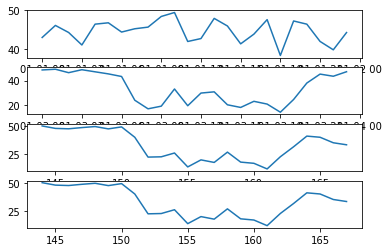

In [ ]:
# Explore whether there is a difference between the speed of ordinary days and holidays
import matplotlib.pyplot as plt

plt.subplot(411)
plt.plot(data_raw['date'][:24],data_raw['speed'][:24])  # New Years（holiday）

plt.subplot(412)
plt.plot(data_raw['date'][48:72],data_raw['speed'][48:72])  # Tuesday（weekday）

Jan_7_2017 = data_raw[(data_raw['year']==2017)&(data_raw['month']==1)&(data_raw['day']==7)]   #Saturday（weekend）
plt.subplot(413)
plt.plot(Jan_7_2017['speed'])

Jan_8_2017 = data_raw[(data_raw['year']==2017)&(data_raw['month']==1)&(data_raw['day']==8)]   #Sunday（weekend）
plt.subplot(414)
plt.plot(Jan_7_2017['speed'])

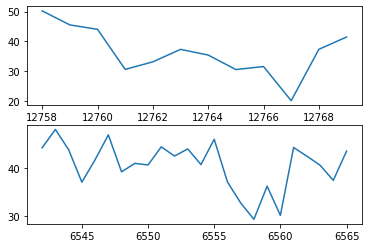

In [ ]:
Oct_1_2017 = data_raw[(data_raw['year']==2017)&(data_raw['month']==10)&(data_raw['day']==1)]
Oct_1_2018 = data_raw[(data_raw['year']==2018)&(data_raw['month']==10)&(data_raw['day']==1)]
# print(Oct_1_2017)

plt.subplot(212)
plt.plot(Oct_1_2017['speed'])

plt.subplot(211)
plt.plot(Oct_1_2018['speed'])

# Conclusion: isHoliday will help

### Add Meteorological features

In [ ]:
# Read Meteorological data
whether = pd.read_csv("./data/whether_data.csv")
whether['date']= pd.to_datetime(whether['date'], format='%Y/%m/%d')

whether['year']= whether['date'].apply(lambda x:x.year) 
whether['month']= whether['date'].apply(lambda x:x.month)
whether['day']= whether['date'].apply(lambda x:x.day)
print("\nwhwther Data Type:",whether.dtypes)


whwther Data Type: date          datetime64[ns]
high_temp              int64
low_temp               int64
avg_temp             float64
ifRain                 int64
wind_speed           float64
year                   int64
month                  int64
day                    int64
dtype: object


In [ ]:
# Add Meteorological related features
data_raw_p = pd.merge(data_raw, whether, on=['year','month','day'])
data_test_p = pd.merge(data_test, whether, on=['year','month','day'])
data_raw_p.head(3)

,id,date_x,speed,year,month,day,hour,dayOfYear,weekOfYear,weekday,ifWeekday,isHoliday,isCommute,date_y,high_temp,low_temp,avg_temp,ifRain,wind_speed
0,0,2017-01-01 00:00:00,43.002930,2017,1,1,0,1,52,7,0,1,0,2017-01-01,23,18,20.5,0,3.5
1,1,2017-01-01 01:00:00,46.118696,2017,1,1,1,1,52,7,0,1,0,2017-01-01,23,18,20.5,0,3.5
2,2,2017-01-01 02:00:00,44.294158,2017,1,1,2,1,52,7,0,1,0,2017-01-01,23,18,20.5,0,3.5


In [ ]:
# Have a look at all data we have
data_raw_p.describe()

,id,speed,year,month,day,hour,dayOfYear,weekOfYear,weekday,ifWeekday,isHoliday,isCommute,high_temp,low_temp,avg_temp,ifRain,wind_speed
count,14006.00000,14006.000000,14006.000000,14006.000000,14006.000000,14006.000000,14006.000000,14006.000000,14006.000000,14006.000000,14006.000000,14006.000000,14006.000000,14006.000000,14006.000000,14006.000000,14006.000000
mean,7002.50000,32.779118,2017.375268,6.491932,15.679138,11.529202,181.918392,26.367057,4.010139,0.710981,0.038412,0.057761,26.277024,21.310581,23.793803,0.535556,1.805512
std,4043.32827,13.573813,0.484209,3.435815,8.793388,6.926150,104.984777,14.992794,2.004539,0.453323,0.192196,0.233299,5.086156,5.091263,5.037478,0.555637,2.098089
min,0.00000,2.573417,2017.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.000000,6.000000,9.500000,0.000000,0.000000
25%,3501.25000,19.301089,2017.000000,4.000000,8.000000,6.000000,91.000000,13.000000,2.000000,0.000000,0.000000,0.000000,22.000000,17.000000,19.500000,0.000000,0.000000
50%,7002.50000,36.580595,2017.000000,6.000000,16.000000,12.000000,181.000000,26.000000,4.000000,1.000000,0.000000,0.000000,27.000000,22.000000,24.500000,1.000000,0.000000
75%,10503.75000,45.877665,2018.000000,9.000000,23.000000,18.000000,272.000000,39.000000,6.000000,1.000000,0.000000,0.000000,31.000000,26.000000,28.500000,1.000000,3.500000
max,14005.00000,53.161286,2018.000000,12.000000,31.000000,23.000000,365.000000,52.000000,7.000000,1.000000,1.000000,1.000000,35.000000,28.000000,31.500000,2.000000,11.500000


### Final features

In [ ]:
# construct final dataset
train_x = data_raw_p[['year','month','day','hour','weekday','ifWeekday','dayOfYear','weekOfYear','isHoliday','wind_speed',\
                    'avg_temp','high_temp','low_temp','ifRain']]
test_x = data_test_p[['year','month','day','hour','weekday','ifWeekday','dayOfYear','weekOfYear','isHoliday','wind_speed',\
                    'avg_temp','high_temp','low_temp','ifRain']]


train_y = data_raw_p[['speed']]
print(train_x.head(5))
print(test_x.head(5))
print(train_y.head(5))
print(train_x.dtypes)
print("train_x.shape:",train_x.shape)
print("test_x.shape:",test_x.shape)
print("train_y.shape:",train_y.shape)

   year  month  day  hour  weekday  ifWeekday  dayOfYear  weekOfYear  \
0  2017      1    1     0        7          0          1          52   
1  2017      1    1     1        7          0          1          52   
2  2017      1    1     2        7          0          1          52   
3  2017      1    1     3        7          0          1          52   
4  2017      1    1     4        7          0          1          52   

   isHoliday  wind_speed  avg_temp  high_temp  low_temp  ifRain  
0          1         3.5      20.5         23        18       0  
1          1         3.5      20.5         23        18       0  
2          1         3.5      20.5         23        18       0  
3          1         3.5      20.5         23        18       0  
4          1         3.5      20.5         23        18       0  
   year  month  day  hour  weekday  ifWeekday  dayOfYear  weekOfYear  \
0  2018      1    1     2        1          1          1           1   
1  2018      1    1     5  

# 3. Train the model: XGBoost

## 3.1 Using cross validation —— model

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


# cv_params = {'n_estimator':[1,2,3,4,5]}
cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}
# cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
# cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
# cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9,1], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}
# cv_params = {'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}
other_params = {'learning_rate': 0.05, 'n_estimators': 150, 'max_depth': 5, 'min_child_weight': 3, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.5, 'reg_alpha': 0.1, 'reg_lambda': 2}
model = XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params,
                             scoring='neg_mean_squared_error', cv=3, verbose=3, n_jobs=5)
optimized_GBM.fit(train_x, train_y)
evalute_result = optimized_GBM.cv_results_
print('Results of each iteration:{0}'.format(evalute_result))
print('The best value of the parameter：{0}'.format(optimized_GBM.best_params_))
print('Best model score:{0}'.format(optimized_GBM.best_score_))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  12 out of  15 | elapsed:   11.6s remaining:    2.9s
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:   12.0s finished


Results of each iteration:{'mean_fit_time': array([2.65469352, 2.56824605, 2.52135785, 2.54288395, 2.20081425]), 'std_fit_time': array([0.14274954, 0.05548333, 0.02875126, 0.11379613, 0.13243822]), 'mean_score_time': array([0.0541482 , 0.06453196, 0.09131813, 0.08540901, 0.04838419]), 'std_score_time': array([0.02006103, 0.01171261, 0.01996879, 0.02285736, 0.00554873]), 'param_learning_rate': masked_array(data=[0.01, 0.05, 0.07, 0.1, 0.2],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'learning_rate': 0.01}, {'learning_rate': 0.05}, {'learning_rate': 0.07}, {'learning_rate': 0.1}, {'learning_rate': 0.2}], 'split0_test_score': array([-86.67335826, -16.67829292, -16.65928661, -16.7879847 ,
       -18.23345425]), 'split1_test_score': array([-83.19009085, -14.51028955, -14.36101772, -14.50369671,
       -15.9530388 ]), 'split2_test_score': array([-94.04273545, -17.43981654, -17.1888481 , -17.46654024,
       -18.0806247

## 3.2 Manual tuning —— model2

In [ ]:
# Split the Train/Val data to help train the model
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = .1, random_state=0)


print(train_x.values)
print(train_y.values)
print(val_x.values)
print(train_x)

train_x = train_x.values.reshape(12605,14)  #!the second input of reshape() is changing with number of features
train_y = train_y.values.reshape(12605,1)

val_x = val_x.values.reshape(1401,14)  #!the second input of reshape() is changing with number of features
val_y = val_y.values

print(train_x)
print(train_x.shape)

[[2.017e+03 1.100e+01 1.400e+01 ... 2.300e+01 2.000e+01 0.000e+00]
 [2.018e+03 5.000e+00 7.000e+00 ... 2.800e+01 2.300e+01 1.000e+00]
 [2.017e+03 1.100e+01 3.000e+00 ... 2.700e+01 1.900e+01 0.000e+00]
 ...
 [2.018e+03 3.000e+00 1.600e+01 ... 2.500e+01 1.800e+01 0.000e+00]
 [2.018e+03 5.000e+00 2.000e+01 ... 3.300e+01 2.700e+01 0.000e+00]
 [2.017e+03 4.000e+00 2.500e+01 ... 2.800e+01 2.300e+01 2.000e+00]]
[[20.00258219]
 [48.54233886]
 [20.5682067 ]
 ...
 [21.84969361]
 [47.25099589]
 [42.76616118]]
[[2.017e+03 1.000e+00 2.000e+01 ... 2.000e+01 1.300e+01 0.000e+00]
 [2.017e+03 1.000e+00 2.000e+01 ... 2.000e+01 1.300e+01 0.000e+00]
 [2.017e+03 3.000e+00 1.500e+01 ... 2.100e+01 1.800e+01 0.000e+00]
 ...
 [2.017e+03 1.000e+00 1.000e+00 ... 2.300e+01 1.800e+01 0.000e+00]
 [2.017e+03 6.000e+00 2.200e+01 ... 3.200e+01 2.700e+01 1.000e+00]
 [2.017e+03 1.000e+01 2.500e+01 ... 2.700e+01 2.200e+01 0.000e+00]]
       year  month  day  hour  weekday  ifWeekday  dayOfYear  weekOfYear  \
7617   2017 

In [ ]:
# construct the model
from xgboost import XGBRegressor

model2 = XGBRegressor(learning_rate=0.1, n_estimators=216, max_depth=8, min_child_weight=5)
model2.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=216, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Calculate the root mean square error

from sklearn.metrics import mean_squared_error
from math import sqrt


Y_pred=model2.predict(val_x)
Y_train_pred = model2.predict(train_x)

MSE2 = mean_squared_error(Y_pred,val_y)
print('val err:',MSE2)
# RMSE=sqrt(MSE2)
# print(RMSE)
MSE2_train= mean_squared_error(Y_train_pred,train_y)
print('train err:',MSE2_train)

val err: 10.809557855954786
train err: 4.561747871569745


# 4. Generate prediction results and write_file

In [ ]:
# Y_pred=optimized_GBM.predict(test_x)

Y_pred=model2.predict(test_x)

### write_csv

In [ ]:
# Build data columns
data_id = np.array(range(0,Y_pred.shape[0]))
print(len(data_id))
print(len(Y_pred))

1401
1401


In [ ]:
# Build result dataframe
result = pd.DataFrame()
result['id'] = data_id
result['speed'] = Y_pred
result.head(5)

,id,speed
0,0,35.887829
1,1,48.489967
2,2,24.018654
3,3,13.667279
4,4,17.645607


In [ ]:
# Save file
result.to_csv("./output/result.csv",index=False,sep=',')